# 1. Game of Life

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../../style.mplstyle")

from tqdm import tqdm

from game_of_life import GameOfLife, Glider

from scipy.optimize import curve_fit

# 2. Equilibration

In [3]:
nruns = 1000
equilibration_times = [GameOfLife.equilibration_time() for i in tqdm(range(nruns), unit="run")]
np.savetxt("equilibration_times.txt", equilibration_times)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:49<00:00,  5.91run/s]


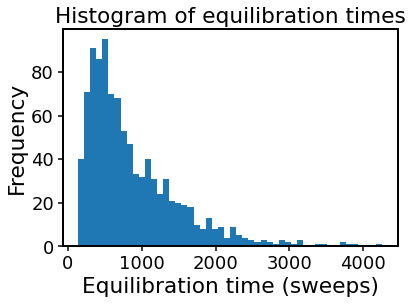

In [4]:
equilibration_times = np.loadtxt("equilibration_times.txt")

fig, ax = plt.subplots()
ax.hist(equilibration_times, bins=50)
ax.set_title(f"Histogram of equilibration times")
ax.set_xlabel("Equilibration time (sweeps)")
ax.set_ylabel("Frequency")
plt.show()

# 3. Glider Speed

In [5]:
time, centre_of_mass, average_velocity, average_speed = Glider.calculate_average_velocity(5000)
centre_of_mass = np.linalg.norm(centre_of_mass, axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 13366.49sweep/s]


In [6]:
def integrate_velocity(time, velocity, starting_position, period):
    return velocity * (time%period) + starting_position

(velocity, starting_position, period), _ = curve_fit(integrate_velocity,
                                                     time,
                                                     centre_of_mass,
                                                     p0=[1, 60/200, 200]
                                                    )

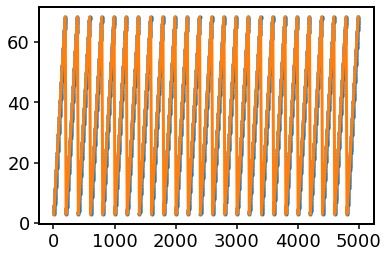

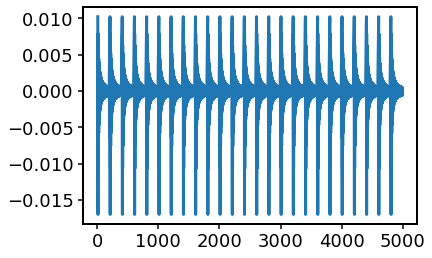

In [7]:
plt.plot(time, centre_of_mass, '.')
plt.plot(time, integrate_velocity(time, velocity, starting_position, period))
plt.show()
plt.plot(time, (integrate_velocity(time, velocity, starting_position, period) - centre_of_mass)/centre_of_mass)

In [8]:
print(f"{velocity = }")

velocity = 0.35350766407730133


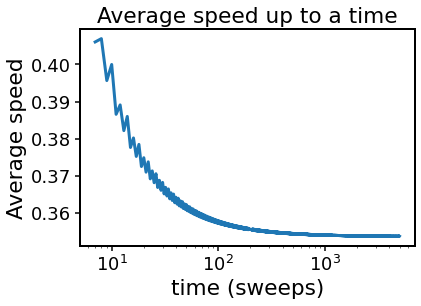

In [9]:
fig, ax = plt.subplots()
ax.semilogx(time, average_speed)
ax.set_title("Average speed up to a time")
ax.set_xlabel("time (sweeps)")
ax.set_ylabel("Average speed")
plt.show()

In [10]:
print(f"Average speed is {average_speed[-1]:.6f} cells per sweep")

Average speed is 0.353638 cells per sweep


We can see from the figure below that moving Δx=1 and Δy=1 takes Δt=4, so the glider travels at a speed of np.sqrt(Δx**2 + Δy**2)/Δt = 0.353553 cells per sweep


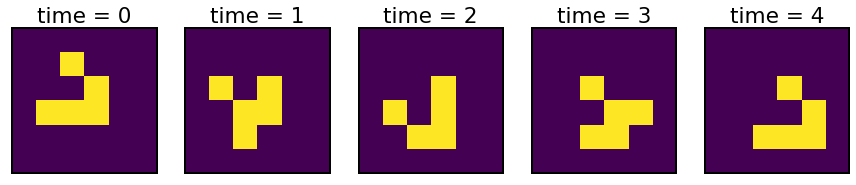

In [11]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))

glider = Glider(6, 2, 2)

for i, ax in enumerate(axes):
    ax.set_title(f"time = {i}")
    ax.imshow(glider.get_grid())
    #ax.plot(*glider.calculate_centre_of_mass(), 'o')
    ax.set(xticks=[], yticks=[])
    glider.update_grid()

Δx = 1
Δy = 1
Δt = 4

print(f"We can see from the figure below that moving {Δx=} and {Δy=} takes {Δt=}, so the glider travels at a speed of {np.sqrt(Δx**2 + Δy**2)/Δt = :.6f} cells per sweep")